In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_por = pd.read_csv('student-alcohol-consumption/student-por.csv')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
#Existen mas alumnos de Portugués en la escuela Mousinho da Silveira que en la Gabriel Pereira. 
df_por.groupby('school').agg({'sex': 'count'}).reset_index().rename(columns={'sex':'count'})

,school,count
0,GP,423
1,MS,226


In [4]:
df_mat = pd.read_csv('student-alcohol-consumption/student-mat.csv')
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df_mat['gpa'] = (df_mat['G1'] + df_mat['G2'] + df_mat['G3']) / 3
df_por['gpa'] = (df_por['G1'] + df_por['G2'] + df_por['G3']) / 3

In [6]:
df_mat['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [7]:
# Los alumnos de Matemática que eligieron el colegio en función de la cercanía a su hogar tienen mejor promedio de calificación, que los alumnos de Portugués que eligieron el establecimiento con igual criterio 
print(df_mat.loc[df_mat['reason'] == 'home']['gpa'].mean())
print(df_por.loc[df_por['reason'] == 'home']['gpa'].mean())

10.60550458715597
11.874720357941838


In [8]:
# From Kaggle: Additional note: there are several (382) students that belong to both datasets . 
# These students can be identified by searching for identical attributes that characterize each student, as shown in the annexed R file.
df_gen = df_mat.append(df_por)
print(df_por['school'].count())
print(df_mat['school'].count())
print(df_gen['school'].count())

# drop duplicates based on the criteria in the specified R file
df_gen.drop_duplicates(keep='first',inplace=True, subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
len(df_gen)

649
395
1044


662

In [9]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 642
Data columns (total 34 columns):
school        662 non-null object
sex           662 non-null object
age           662 non-null int64
address       662 non-null object
famsize       662 non-null object
Pstatus       662 non-null object
Medu          662 non-null int64
Fedu          662 non-null int64
Mjob          662 non-null object
Fjob          662 non-null object
reason        662 non-null object
guardian      662 non-null object
traveltime    662 non-null int64
studytime     662 non-null int64
failures      662 non-null int64
schoolsup     662 non-null object
famsup        662 non-null object
paid          662 non-null object
activities    662 non-null object
nursery       662 non-null object
higher        662 non-null object
internet      662 non-null object
romantic      662 non-null object
famrel        662 non-null int64
freetime      662 non-null int64
goout         662 non-null int64
Dalc          662 no

In [10]:
df_gen.groupby('school')['gpa'].mean()

school
GP    10.913210
MS    10.353801
Name: gpa, dtype: float64

In [11]:
workday_consumption_per_famsize = df_gen.groupby(['Dalc', 'famsize'], sort=True).agg({'school': 'count'}).rename(columns={'school': 'count'})
weekend_consumption_per_famsize = df_gen.groupby(['Walc', 'famsize'], sort=True).agg({'school': 'count'}).rename(columns={'school': 'count'})
print(workday_consumption_per_famsize)
print(weekend_consumption_per_famsize)

# Result: there is a major consumption among families with more than 3 members

              count
Dalc famsize       
1    GT3        333
     LE3        127
2    GT3         78
     LE3         44
3    GT3         27
     LE3         18
4    GT3         11
     LE3          7
5    GT3         12
     LE3          5
              count
Walc famsize       
1    GT3        190
     LE3         65
2    GT3        100
     LE3         47
3    GT3         85
     LE3         39
4    GT3         59
     LE3         31
5    GT3         27
     LE3         19


In [12]:
# create gpa column
df_gen['gpa'].value_counts().sort_index(ascending=False).head(5)

19.333333    1
18.666667    3
18.333333    2
18.000000    6
17.666667    5
Name: gpa, dtype: int64

In [13]:
df_gen.groupby('reason')['gpa'].mean().sort_values(ascending=False)

# shows that on average those who choose reputation over closeness have a slightly bether gpa

reason
reputation    11.530201
home          10.686534
other         10.472973
course        10.383102
Name: gpa, dtype: float64

In [14]:
mean_gpa_no_parents_work = df_gen.loc[(df_gen['Mjob'] == 'at_home') & (df_gen['Fjob'] == 'at_home'), 'gpa'].mean()

# use exclusive or. ASsignment asks for only one parent working
mean_gpa_one_parents_work = df_gen.loc[np.logical_xor(df_gen['Mjob'] == 'at_home', df_gen['Fjob'] == 'at_home'), 'gpa'].mean()

print("Both at home:", mean_gpa_no_parents_work)
print("One at work:", mean_gpa_one_parents_work)

Both at home: 11.166666666666664
One at work: 9.649006622516556


In [15]:
df_gen.groupby('famsize').agg({'gpa': 'mean'}).sort_values(by='gpa',ascending=False)

,gpa
famsize,
LE3,11.082919
GT3,10.562545


In [16]:
df_gen.groupby('famsize').count()

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gpa
famsize,,,,,,,,,,,,,,,,,,,,,
GT3,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461
LE3,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,201


In [17]:
df_por.groupby('school').count()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gpa
school,,,,,,,,,,,,,,,,,,,,,
GP,423,423,423,423,423,423,423,423,423,423,...,423,423,423,423,423,423,423,423,423,423
MS,226,226,226,226,226,226,226,226,226,226,...,226,226,226,226,226,226,226,226,226,226


In [18]:
df_gen['Pstatus'].value_counts()

T    579
A     83
Name: Pstatus, dtype: int64

In [19]:
df_gen['Pedu_prom'] = (df_gen['Fedu'] + df_gen['Medu']) / 2

In [20]:
#El nivel de educación de los padres que viven juntos es levemente superior al de aquellos que viven separados

prom_edu_parents_together = df_gen.loc[df_gen['Pstatus'] == 'T']['Pedu_prom'].mean()
prom_edu_parents_not_together = df_gen.loc[df_gen['Pstatus'] == 'A']['Pedu_prom'].mean()

print(prom_edu_parents_together)
print(prom_edu_parents_not_together)

2.373056994818653
2.5301204819277108


In [21]:
df_gen['romantic'].value_counts()

no     414
yes    248
Name: romantic, dtype: int64

In [22]:
df_gen.groupby('romantic').agg({'Dalc':'mean', 'Walc':'mean'})

,Dalc,Walc
romantic,,
no,1.475845,2.318841
yes,1.552419,2.221774


In [23]:
df_gen.groupby('sex').agg({'Dalc':'mean', 'Walc':'mean'})

,Dalc,Walc
sex,,
F,1.279487,1.928205
M,1.827206,2.790441


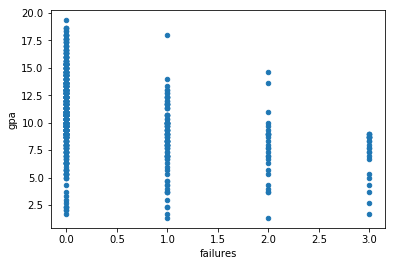

In [24]:
df_gen[['failures', 'gpa']].plot(kind='scatter', x='failures', y='gpa')